In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from mpl_toolkits.mplot3d import Axes3D, axes3d
from mpl_toolkits.mplot3d import Axes3D, axes3d

from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [2]:
D = 0.01

# Значение времени и расстояния
T = 10 # 110
X = 1

# количество интервалов разбиения
Nt = 100 # 200
Nx = 10

# Определение шага
dt = T/Nt
dx = X/Nx
print(dt, dx)

cond = 2*(D*dt)/dx**2
print("Условие устойчивости: %.3f" % cond)

def foo(x):
    if (x < 0):
        return 0
    elif (x == 0):
        return 0.5
    else:
        return 1

0.1 0.1
Условие устойчивости: 0.200


Задание граничных условий

In [3]:
M = np.zeros((Nx, Nt))

for i in range(0, Nx):
    x = i * dx
    M[i, 0] = foo(x-0.25) - foo(x-0.75)

for j in range(0, Nt):
    M[0, j] = 0
    M[Nx-1, j] = 0

Цикл, вычисляющий значения в узлах

In [4]:
for j in range(1, Nt):
    for i in range(1, Nx-1):
        M[i, j] = dt * D * ((M[i+1, j-1] - 2*M[i, j-1] + M[i-1, j-1])/dx**2) + M[i, j-1]

df = pd.DataFrame(M)
df = df.applymap(lambda x: "{:.1e}".format(x))
df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,...,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00
1,0.0e+00,0.0e+00,1.0e-02,2.5e-02,4.2e-02,5.9e-02,7.6e-02,9.1e-02,1.0e-01,1.2e-01,...,1.1e-01,1.1e-01,1.1e-01,1.1e-01,1.0e-01,1.0e-01,1.0e-01,1.0e-01,9.9e-02,9.8e-02
2,0.0e+00,1.0e-01,1.7e-01,2.2e-01,2.6e-01,2.8e-01,3.0e-01,3.2e-01,3.3e-01,3.4e-01,...,2.1e-01,2.0e-01,2.0e-01,2.0e-01,2.0e-01,1.9e-01,1.9e-01,1.9e-01,1.9e-01,1.8e-01
3,1.0e+00,9.0e-01,8.3e-01,7.8e-01,7.4e-01,7.2e-01,7.0e-01,6.8e-01,6.7e-01,6.5e-01,...,2.8e-01,2.7e-01,2.7e-01,2.7e-01,2.7e-01,2.6e-01,2.6e-01,2.6e-01,2.5e-01,2.5e-01
4,1.0e+00,1.0e+00,9.9e-01,9.7e-01,9.6e-01,9.4e-01,9.2e-01,9.0e-01,8.9e-01,8.7e-01,...,3.2e-01,3.1e-01,3.1e-01,3.1e-01,3.0e-01,3.0e-01,3.0e-01,2.9e-01,2.9e-01,2.9e-01
5,1.0e+00,1.0e+00,1.0e+00,1.0e+00,9.9e-01,9.9e-01,9.8e-01,9.7e-01,9.5e-01,9.4e-01,...,3.2e-01,3.2e-01,3.1e-01,3.1e-01,3.0e-01,3.0e-01,3.0e-01,2.9e-01,2.9e-01,2.9e-01
6,1.0e+00,1.0e+00,9.9e-01,9.7e-01,9.6e-01,9.4e-01,9.2e-01,9.0e-01,8.9e-01,8.7e-01,...,2.8e-01,2.8e-01,2.8e-01,2.7e-01,2.7e-01,2.7e-01,2.6e-01,2.6e-01,2.6e-01,2.5e-01
7,1.0e+00,9.0e-01,8.3e-01,7.8e-01,7.4e-01,7.2e-01,6.9e-01,6.8e-01,6.6e-01,6.5e-01,...,2.1e-01,2.1e-01,2.1e-01,2.0e-01,2.0e-01,2.0e-01,2.0e-01,1.9e-01,1.9e-01,1.9e-01
8,0.0e+00,1.0e-01,1.7e-01,2.2e-01,2.5e-01,2.8e-01,2.9e-01,3.0e-01,3.1e-01,3.1e-01,...,1.1e-01,1.1e-01,1.1e-01,1.1e-01,1.1e-01,1.1e-01,1.0e-01,1.0e-01,1.0e-01,1.0e-01
9,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,...,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00


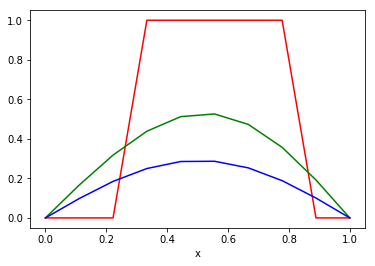

In [5]:
x = np.linspace(0, X, Nx)
plt.xlabel("x")
plt.plot(
    x, M[:, 0], 'r',
    x, M[:, int(Nt/2)], 'g',
    x, M[:, int(Nt-1)], 'b',
)
plt.show()

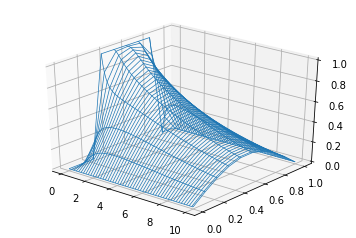

In [6]:
fig = plt.figure()
ax = fig.gca(projection='3d')

x = np.linspace(0, X, Nx)
y = np.linspace(0, T, Nt)

F, S = np.meshgrid(y,x)

ax.plot_wireframe(F, S, M, linewidth=.7)
ax.view_init(30, 310)
plt.show()